# Applied Inversion Class Test: FWI section

## Total time: 1.5 hours (2 questions)

Below are some examples of what you may be asked during the test and some general guidance.

You will be expected to write code, analyse outputs, and explain your reasoning clearly. It may be useful to bring pens and papers with you to assist with calculations. You will not need to submit any of your hand written notes.

---
## Question 1 – Newton's Method vs Gradient Descent (Approx. 45 minutes)

Consider the function:
$$ f(x, y) = 3x^2 + y^2 + 4xy - 6x - 9y $$

1. **Compute the gradient** $\nabla f(x, y)$ and the **Hessian** $H(x, y)$.
2. **Find the eigenvalues** of the Hessian matrix. Comment on their significance for optimization.
3. **Implement Newton’s Method** to find the minimum of this function starting from the initial point $(x_0, y_0) = (0, 0)$.
4. **Implement Gradient Descent** using the same starting point. Use knowledge of the eigenvalues to pick an appropriate step length (you may try multiple values).
5. **Compare the convergence** of the two methods:
   - How many iterations are needed for convergence?
   - How sensitive is Gradient Descent to the choice of step length?
   - Explain the observed behaviour with reference to the eigenvalues of the Hessian.


---
## Question 2 – Full Waveform Inversion (FWI) Analysis (Approx. 45 minutes)

**You will be provided with a working FWI implementation - this will be very similar to the code you were provided with in Lecture 8. This will be based on the Devito package. You will NOT need to write any Devito specific code. You will need to have a good overview of how the algorithm works. You will be asked to run the provided code and may be required to tweak various parameters and interpret how they affect the results, for example:**

1. **Shot Record Analysis:**
   - Plot and inspect the provided shot records.
   - Modify the number of absorbing boundary layers in the code.
   - Explain how this change affects the shot records (e.g., artificial reflections at the edges of the domain).

2. **Step Length Tuning:**
   - Explore different values of the step length $\alpha$ used in the model update step.
   - Identify a range of $\alpha$ for which convergence occurs and a rough optimal value.
   - Comment on the effects of too-small or too-large $\alpha$ in terms of convergence speed and stability.

**You will be required to justify your answers with plots and explanations. As practice you can tweak `nbl`, `alpha` and other parameters in the Lecture 8 notebook you were provided and analyse the effects.**

# Matt

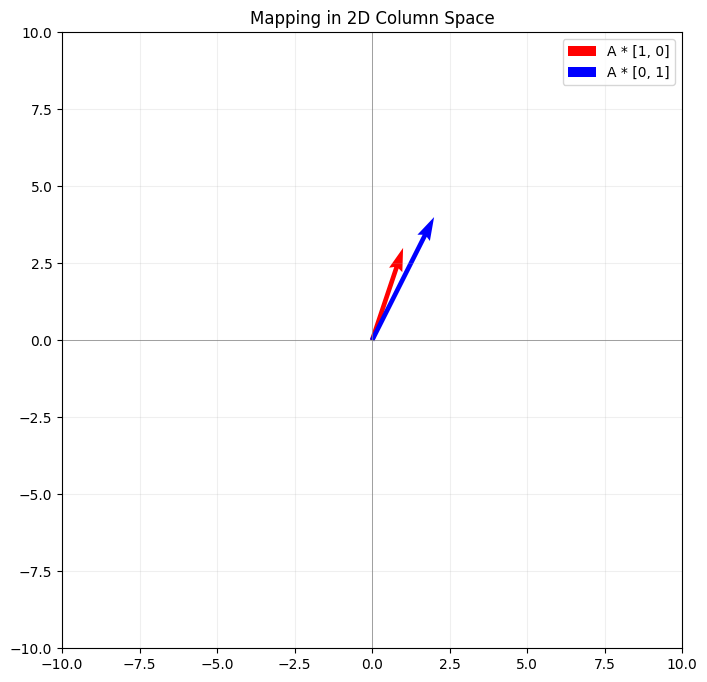

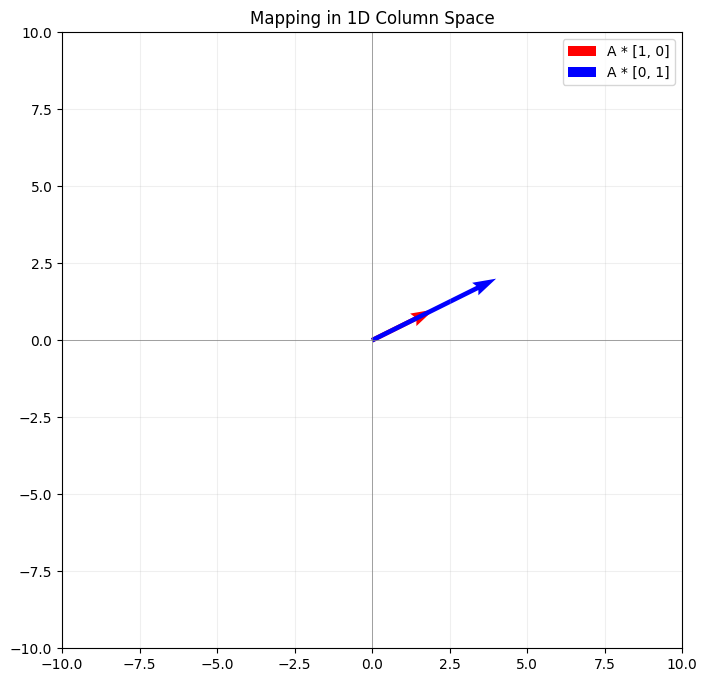

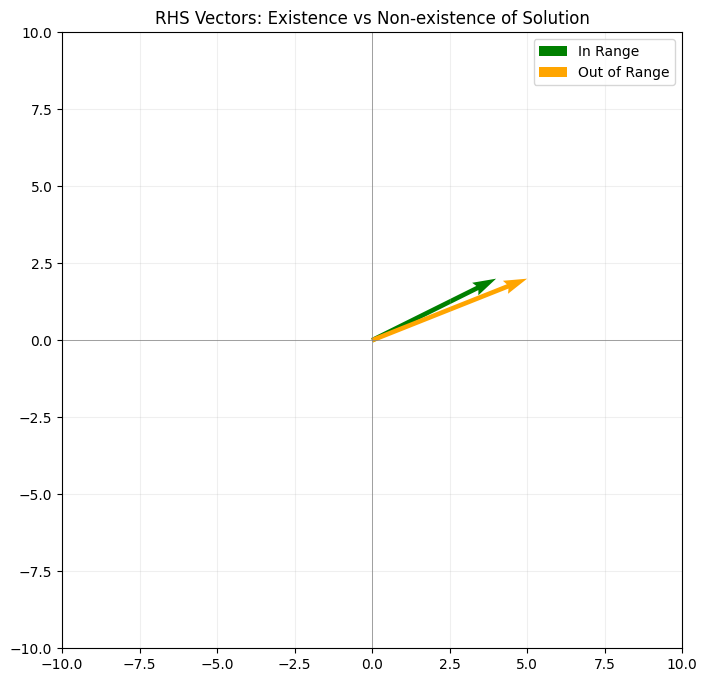

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vectors(vectors, colors, labels, title):
    plt.figure(figsize=(8, 8))
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.grid(alpha=0.2)
    for i, vec in enumerate(vectors):
        plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color=colors[i], label=labels[i])
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.legend()
    plt.title(title)
    plt.show()

# Case 1: Column space is 2D (Matrix is full rank)
A_2D = np.array([[1, 2], [3, 4]])
vectors_2D = [A_2D @ np.array([1, 0]), A_2D @ np.array([0, 1])]
plot_vectors(vectors_2D, ['red', 'blue'], ['A * [1, 0]', 'A * [0, 1]'], 'Mapping in 2D Column Space')

# Case 2: Column space is 1D (Matrix is rank 1)
A_1D = np.array([[2, 4], [1, 2]])  # Second column is a multiple of the first
vectors_1D = [A_1D @ np.array([1, 0]), A_1D @ np.array([0, 1])]
plot_vectors(vectors_1D, ['red', 'blue'], ['A * [1, 0]', 'A * [0, 1]'], 'Mapping in 1D Column Space')

# Demonstrating the existence vs non-existence of solutions for 1D case
b_in_range = np.array([4, 2])  # In the range (multiple of [2, 1])
b_out_range = np.array([5, 2])  # Not in the range

plot_vectors([b_in_range, b_out_range], ['green', 'orange'], ['In Range', 'Out of Range'], 'RHS Vectors: Existence vs Non-existence of Solution')


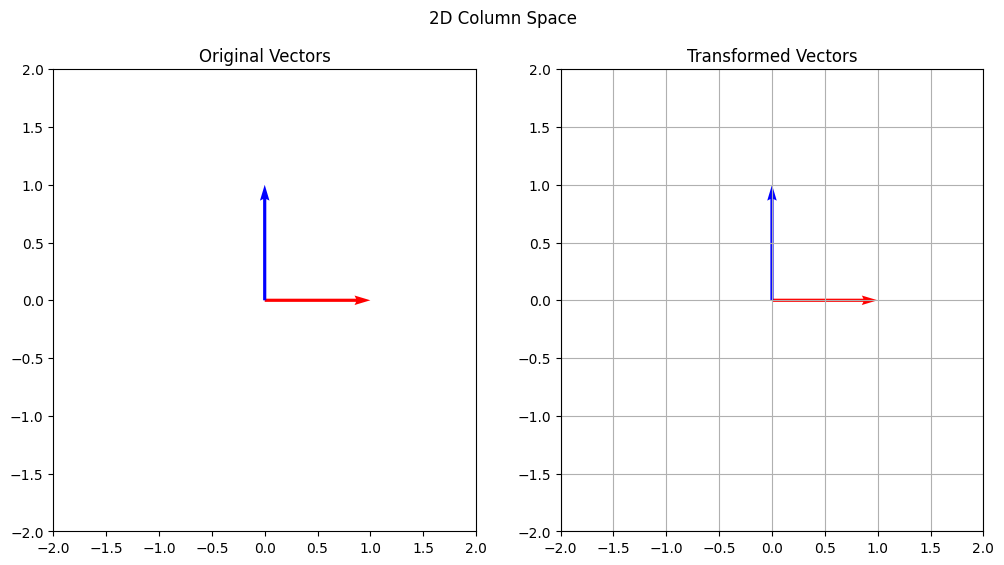

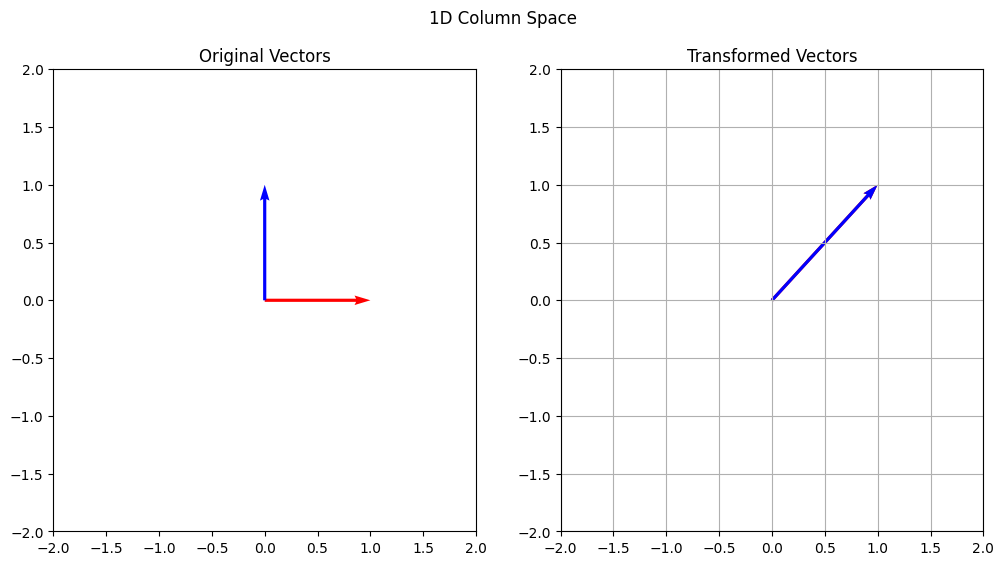

No solution for b_exist
No solution for b_nonexist


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vectors(vectors, colors, ax):
    for i, vector in enumerate(vectors):
        ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=colors[i])

def visualize_mapping(A, vectors, title):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].set_xlim(-2, 2)
    ax[0].set_ylim(-2, 2)
    ax[0].set_title('Original Vectors')
    plot_vectors(vectors, ['red', 'blue'], ax[0])

    # Apply matrix A to each vector
    transformed_vectors = [A @ vector for vector in vectors]

    ax[1].set_xlim(-2, 2)
    ax[1].set_ylim(-2, 2)
    ax[1].set_title('Transformed Vectors')
    plot_vectors(transformed_vectors, ['red', 'blue'], ax[1])

    fig.suptitle(title)
    plt.grid()
    plt.show()

# Example with 2D Column Space
A_2D = np.array([[1, 0], [0, 1]])
vectors_2D = [np.array([1, 0]), np.array([0, 1])]
visualize_mapping(A_2D, vectors_2D, "2D Column Space")

# Example with 1D Column Space
A_1D = np.array([[1, 1], [1, 1]])
vectors_1D = [np.array([1, 0]), np.array([0, 1])]
visualize_mapping(A_1D, vectors_1D, "1D Column Space")

# Demonstrating Existence vs Non-existence of Solutions
b_exist = np.array([2, 2])
b_nonexist = np.array([2, 3])

try:
    x_exist = np.linalg.solve(A_1D, b_exist)
    print("Solution for b_exist:", x_exist)
except np.linalg.LinAlgError:
    print("No solution for b_exist")

try:
    x_nonexist = np.linalg.solve(A_1D, b_nonexist)
    print("Solution for b_nonexist:", x_nonexist)
except np.linalg.LinAlgError:
    print("No solution for b_nonexist")
